<a href="https://colab.research.google.com/github/carlosgomezagrafojo/pollution-data/blob/main/proyect_contaminacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Generamos un nuevo notebook y lo sincronizamos con la cuenta nuestro Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Instalamos módulo de python
!pip install numpy

In [36]:
# importamos pandas, creamos df y verificamos los primeros registros
import pandas as pd
ruta_instrument_data = "/content/drive/MyDrive/proyecto_contaminacion_qraneos/instrument_data.csv"  # Ajusta la ruta
df_instrument = pd.read_csv(ruta_instrument_data, header = 0)  # Usa la primera fila como encabezado
df_instrument.head()

,Measurement date,Station code,Item code,Average value,Instrument status
0,2021-01-01 00:00:00,204,0,0.004,0
1,2021-01-01 00:00:00,204,2,0.059,0
2,2021-01-01 00:00:00,204,4,1.200,0
3,2021-01-01 00:00:00,204,5,0.002,0
4,2021-01-01 00:00:00,204,7,73.000,0


In [32]:
# ver nombres de las columnas df_instrument
print(df_instrument.columns)

Index(['Measurement date', 'Station code', 'Item code', 'Average value',
       'Instrument status', 'Item', 'Status'],
      dtype='object')


In [38]:
# Agregaremos las columnas status e item con las definiciones de las columnas Instrument status e item code, respectivamente al df_instrument
# Diccionarios de mapeo
mapeo_Item_code = {
    0: "SO2",
    2: "NO2",
    4: "CO",
    5: "O3",
    7: "PM10",
    8: "PM2.5"
}

mapeo_Instrument_status = {
    0: "Normal",
    1: "Need for calibration",
    2: "Abnormal",
    4: "Power cut off",
    8: "Under repair",
    9: "Abnormal data"
}

# aplicamos el mapeo de ambos diccionarios en paralelo a df_instrument
df_instrument["Item"] = df_instrument["Item code"].map(mapeo_Item_code)
df_instrument["Status"] = df_instrument["Instrument status"].replace(mapeo_Instrument_status)

# verificamos el resultando mostrado df_instrument
df_instrument.head()

,Measurement date,Station code,Item code,Average value,Instrument status,Item,Status
0,2021-01-01 00:00:00,204,0,0.004,0,SO2,Normal
1,2021-01-01 00:00:00,204,2,0.059,0,NO2,Normal
2,2021-01-01 00:00:00,204,4,1.200,0,CO,Normal
3,2021-01-01 00:00:00,204,5,0.002,0,O3,Normal
4,2021-01-01 00:00:00,204,7,73.000,0,PM10,Normal


In [39]:
# cantidad de registros
df_instrument.count()

,0
Measurement date,3703662
Station code,3703662
Item code,3703662
Average value,3703662
Instrument status,3703662
Item,3703662
Status,3703662


In [40]:
# numero de filas y columnas1
df_instrument.shape

(3703662, 7)

In [41]:
# información general
print(df_instrument.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3703662 entries, 0 to 3703661
Data columns (total 7 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Measurement date   object 
 1   Station code       int64  
 2   Item code          int64  
 3   Average value      float64
 4   Instrument status  int64  
 5   Item               object 
 6   Status             object 
dtypes: float64(1), int64(3), object(3)
memory usage: 197.8+ MB
None


In [44]:
# convierto las columnas Item y Status a strings
df_instrument["Item"] = df_instrument["Item"].astype(str)
df_instrument["Status"] = df_instrument["Status"].astype(str)
print(df_instrument.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3703662 entries, 0 to 3703661
Data columns (total 7 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Measurement date   object 
 1   Station code       int64  
 2   Item code          int64  
 3   Average value      float64
 4   Instrument status  int64  
 5   Item               object 
 6   Status             object 
dtypes: float64(1), int64(3), object(3)
memory usage: 197.8+ MB
None


In [46]:
print(type(df_instrument["Item"].iloc[0]))  # Verifico el tipo del primer valor para verificar si es un string
print(type(df_instrument["Status"].iloc[0]))  # Lo mismo para la otra columna

<class 'str'>
<class 'str'>


In [49]:
# últimos 5 registros
df_instrument.tail(5)

,Measurement date,Station code,Item code,Average value,Instrument status,Item,Status
3703657,2023-11-30 23:00:00,228,7,41.000,0,PM10,Normal
3703658,2023-11-30 23:00:00,228,5,0.008,0,O3,Normal
3703659,2023-11-30 23:00:00,228,4,0.600,0,CO,Normal
3703660,2023-11-30 23:00:00,228,2,0.045,0,NO2,Normal
3703661,2023-11-30 23:00:00,228,0,0.004,0,SO2,Normal


In [52]:
# verificar si hay valores nulos
print(df_instrument.isnull().sum())

Measurement date     0
Station code         0
Item code            0
Average value        0
Instrument status    0
Item                 0
Status               0
dtype: int64


In [53]:
# verificamos si existen valores duplicados
print(df_instrument.duplicated().sum())

0


In [54]:
# transformamos la columna Measurement date en tipo datetime64[ns]
df_instrument["Measurement date"] = pd.to_datetime(df_instrument["Measurement date"])
# verificamos el cambio del tipo de dato
print(df_instrument.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3703662 entries, 0 to 3703661
Data columns (total 7 columns):
 #   Column             Dtype         
---  ------             -----         
 0   Measurement date   datetime64[ns]
 1   Station code       int64         
 2   Item code          int64         
 3   Average value      float64       
 4   Instrument status  int64         
 5   Item               object        
 6   Status             object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(2)
memory usage: 197.8+ MB
None


In [57]:
# verificamos las 1eras y las últimas fechas
print(df_instrument["Measurement date"].head())
print(df_instrument["Measurement date"].tail())

0   2021-01-01
1   2021-01-01
2   2021-01-01
3   2021-01-01
4   2021-01-01
Name: Measurement date, dtype: datetime64[ns]
3703657   2023-11-30 23:00:00
3703658   2023-11-30 23:00:00
3703659   2023-11-30 23:00:00
3703660   2023-11-30 23:00:00
3703661   2023-11-30 23:00:00
Name: Measurement date, dtype: datetime64[ns]


In [59]:
# verificamos las partes específicas de Measurement date
df_instrument["año"] = df_instrument["Measurement date"].dt.year       # Año
df_instrument["mes"] = df_instrument["Measurement date"].dt.month      # Mes
df_instrument["día"] = df_instrument["Measurement date"].dt.day        # Día
df_instrument["día_semana"] = df_instrument["Measurement date"].dt.day_name()  # "Día"
df_instrument.head()

,Measurement date,Station code,Item code,Average value,Instrument status,Item,Status,año,mes,día,día_semana
0,2021-01-01,204,0,0.004,0,SO2,Normal,2021,1,1,Friday
1,2021-01-01,204,2,0.059,0,NO2,Normal,2021,1,1,Friday
2,2021-01-01,204,4,1.200,0,CO,Normal,2021,1,1,Friday
3,2021-01-01,204,5,0.002,0,O3,Normal,2021,1,1,Friday
4,2021-01-01,204,7,73.000,0,PM10,Normal,2021,1,1,Friday


In [60]:
# Promedio de pollution por estación tomando en cuenta toda la data
df_instrument.groupby("Station code")["Average value"].mean()

,Average value
Station code,
204,10.242859
205,10.206449
206,10.433790
207,11.292960
208,10.805200
209,13.578277
210,12.648037
211,12.606988
212,10.241732


In [68]:
# cantidad de estaciones distintas "station code"
df_instrument["Station code"].nunique()

25

In [66]:
# agrupamos por "Station code" e "Instrument status" para pivotear con "Item" a fin de sacar las siguientes medidas: promedio, cantidad, min y max
df_instrument_pivot = df_instrument.pivot_table(
    index=["Station code", "Instrument status"],  # Agrupar por Estación y Estado del Instrumento
    columns="Item",  # Pivotear por Ítem
    values="Average value",  # Agregar los valores de las mediciones
    aggfunc={"Average value": ["mean", "count" ,"min", "max"]}  # Calcular media, suma y máximo
)

df_pivot # mostrar df_pivot

count                                      \
Item                                 CO      NO2       O3     PM10    PM2.5   
Station code Instrument status                                                
204          0                  25634.0  25691.0  25694.0  25417.0  25464.0   
             1                    170.0    167.0    164.0    173.0    173.0   
             2                     50.0      NaN      NaN     53.0    125.0   
             4                     33.0     33.0     32.0     23.0     25.0   
             8                      8.0      8.0      8.0     35.0     33.0   
...                                 ...      ...      ...      ...      ...   
228          1                    214.0    216.0    212.0    133.0    199.0   
             2                      3.0     10.0     14.0     19.0      NaN   
             4                     26.0     28.0     28.0     27.0     29.0   
             8                     29.0     29.0     29.0     29.0     13.0   
             9                      NaN      6.0      1.0    602.0    231.0   

                                          max                       ...  \
Item                                SO2    CO    NO2     O3   PM10  ...   
Station code Instrument status                                      ...   
204          0                  25490.0   2.3  0.109  0.164  289.0  ...   
             1                    169.0  40.0  0.068  0.325  516.0  ...   
             2                      NaN   0.7    NaN    NaN   91.0  ...   
             4                     34.0   0.8  0.047  0.037   30.0  ...   
             8                    204.0   0.6  0.040  0.015   32.0  ...   
...                                 ...   ...    ...    ...    ...  ...   
228          1                    214.0  36.7  0.096  0.332  622.0  ...   
             2                     14.0   0.4  0.027  0.018   86.0  ...   
             4                     28.0   0.5  0.069  0.024   67.0  ...   
             8                    339.0   0.6  0.057  0.013   63.0  ...   
             9                    198.0   NaN  0.023  0.041  400.0  ...   

                                    mean                                   \
Item                                  O3        PM10      PM2.5       SO2   
Station code Instrument status                                              
204          0                  0.024597   37.733367  22.587064  0.004267   
             1                  0.029970   79.526012  69.341040  0.026166   
             2                       NaN   37.226415  21.192000       NaN   
             4                 -0.682000    0.347826  -0.280000 -0.646647   
             8                 -0.248125    3.057143   1.060606 -0.008824   
...                                  ...         ...        ...       ...   
228          1                  0.026146  112.263158  63.447236  0.027967   
             2                  0.007857   27.421053        NaN  0.004000   
             4                 -0.676750    3.740741  11.931034 -0.677929   
             8                  0.000828    3.206897   1.000000  0.018670   
             9                  0.041000   41.508306  38.952381  0.011808   

                                min                                   
Item                             CO    NO2     O3  PM10 PM2.5    SO2  
Station code Instrument status                                        
204          0                  0.2  0.004  0.001   3.0   1.0  0.001  
             1                  0.0  0.000  0.000  -1.0  -1.0  0.000  
             2                  0.2    NaN    NaN  17.0   0.0    NaN  
             4                 -1.0 -1.000 -1.000  -1.0  -1.0 -1.000  
             8                 -1.0 -1.000 -1.000  -1.0  -1.0 -1.000  
...                             ...    ...    ...   ...   ...    ...  
228          1                  0.0 -1.000  0.000  -1.0  -1.0  0.000  
             2                  0.3  0.008  0.002   1.0   NaN  0.003  
             4  

In [70]:
# creamos un data frame en donde solamente se tomen en cuenta los registros con las mediciones igual a "Normal" => Instrument status = 0 ; Status = Normal
df_instrument_normal = df_instrument[df_instrument["Instrument status"] == 0]
df_instrument_normal.head()

,Measurement date,Station code,Item code,Average value,Instrument status,Item,Status,año,mes,día,día_semana
0,2021-01-01,204,0,0.004,0,SO2,Normal,2021,1,1,Friday
1,2021-01-01,204,2,0.059,0,NO2,Normal,2021,1,1,Friday
2,2021-01-01,204,4,1.200,0,CO,Normal,2021,1,1,Friday
3,2021-01-01,204,5,0.002,0,O3,Normal,2021,1,1,Friday
4,2021-01-01,204,7,73.000,0,PM10,Normal,2021,1,1,Friday


In [73]:
# veamos la cantidad de registros
df_instrument_normal.shape

(3606696, 11)

In [76]:
# Agrupamos por "año" y pivoteamos por Item
df_instrument_normal_pivot_time = df_instrument_normal.pivot_table(
    index="año",  # Agrupar por año
    columns="Item",  # Pivotear por Item (SO2, NO2, etc.)
    values="Average value",  # Agregar los valores de las mediciones
    aggfunc=["mean", "max"]  # Calcular la media y la suma
)
df_instrument_normal_pivot_time

mean                                                      max  \
Item        CO       NO2        O3       PM10      PM2.5       SO2   CO   
año                                                                       
2021  0.518657  0.029616  0.024908  43.775169  24.604890  0.004635  2.9   
2022  0.502998  0.028143  0.023346  39.662035  22.780400  0.004358  2.4   
2023  0.526537  0.027945  0.026197  42.985614  25.484394  0.004025  3.2   

                                         
Item    NO2     O3   PM10  PM2.5    SO2  
año                                      
2021  0.117  0.163  423.0  175.0  0.041  
2022  0.121  0.188  470.0  204.0  0.025  
2023  0.123  0.215  299.0  195.0  0.026

In [75]:
# Agrupamos por: "Station" y "año" y pivoteamos por Item
df_instrument_normal_pivot_time_Station = df_instrument_normal.pivot_table(
    index= ["Station code","año"],  # Agrupar por año
    columns="Item",  # Pivotear por Item (SO2, NO2, etc.)
    values="Average value",  # Agregar los valores de las mediciones
    aggfunc=["mean", "max"]  # Calcular la media y la suma
)
df_instrument_normal_pivot_time_Station

mean                                            \
Item                     CO       NO2        O3       PM10      PM2.5   
Station code año                                                        
204          2021  0.562500  0.033590  0.026044  40.185984  24.369249   
             2022  0.576747  0.031502  0.024709  35.416667  20.725222   
             2023  0.589843  0.029983  0.022971  37.616352  22.693726   
205          2021  0.506536  0.034689  0.025340  40.474127  24.472704   
             2022  0.511426  0.030702  0.024861  36.151676  21.546376   
...                     ...       ...       ...        ...        ...   
227          2022  0.602075  0.027259  0.023713  41.622945  22.325997   
             2023  0.510329  0.032707  0.024090  40.738098  23.388984   
228          2021  0.517993  0.030741  0.023476  48.437261  23.805923   
             2022  0.503837  0.029981  0.020798  44.411813  23.309540   
             2023  0.482979  0.028916  0.022519  41.793259  25.200769   

                             max                                     
Item                    SO2   CO    NO2     O3   PM10  PM2.5    SO2  
Station code año                                                     
204          2021  0.004260  2.2  0.109  0.140  255.0  128.0  0.014  
             2022  0.004791  2.1  0.100  0.164  289.0  127.0  0.016  
             2023  0.003742  2.3  0.089  0.137  202.0  148.0  0.017  
205          2021  0.003825  2.0  0.100  0.142  267.0  116.0  0.016  
             2022  0.003497  2.1  0.100  0.175  296.0  132.0  0.015  
...                     ...  ...    ...    ...    ...    ...    ...  
227          2022  0.003875  2.0  0.104  0.159  426.0  140.0  0.013  
             2023  0.003332  2.1  0.114  0.170  200.0  153.0  0.013  
228          2021  0.004028  2.0  0.106  0.150  423.0  144.0  0.012  
             2022  0.004482  1.8  0.113  0.135  443.0  145.0  0.013  
             2023  0.003739  1.7  0.108  0.114  255.0  171.0  0.011  

[75 rows x 12 columns]

In [77]:
# Concentración media diaria de contaminantes por estaciones
df_instrument_normal_pivot_time_Station_SO2 = df_instrument_normal.pivot_table(
    index= "día",  # Agrupar por día
    columns="Station code",  # Pivotear por station code
    values="Average value",  # Agregar los valores de las mediciones
    aggfunc=["mean", "max"]  # Calcular la media y max
)
df_instrument_normal_pivot_time_Station_SO2

mean                                              \
Station code        204        205        206        207        208   
día                                                                   
1             10.475007  10.139012  10.548423  11.009761  11.546587   
2             10.805789  10.736062  11.096730  11.333898  11.537030   
3             10.359005  10.427046  10.774491  11.139259  11.365257   
4             10.685816  11.324596  11.823900  11.140104  11.748635   
5             10.226763  11.094113  11.440829  11.430997  11.378085   
6             10.084335  10.447295  11.055963  11.803699  11.098358   
7              9.137817   8.916841   9.243836   9.782636   9.410722   
8              9.585796   9.470419   9.068199  10.078773  10.215583   
9              9.856386   9.841853   9.329991  10.465001  10.507084   
10             8.674445   8.148212   8.136581   9.791395   9.472416   
11             9.041431   8.698047   8.933692  10.484631   9.887464   
12             9.323289   9.247357   9.062387  10.329823  10.210207   
13             9.539843   9.727126  10.005420  10.615441  10.301340   
14            10.137973  10.428750  10.557056  11.621899  11.438791   
15            10.001935  10.125444  10.736892  11.377164  11.081740   
16             9.744597   9.842232   9.995574  10.584662  10.335203   
17             9.689888  10.098290  10.168832  10.633873  10.857780   
18            10.263777  10.534335  10.470926  11.480221  11.613228   
19            10.633823  10.962549  11.264918  11.757030  12.008108   
20            10.769436  11.118173  11.698529  12.097335  12.309190   
21            10.381070  10.404360  10.836621  11.213942  11.377530   
22            10.954601  10.964066  11.292183  12.135636  11.836853   
23            10.569385  10.433603  11.052412  11.688278  10.839738   
24            10.358168  10.205152  10.967387  11.206796  11.286399   
25            10.759487  10.799156  11.471725  11.784647  12.272140   
26            10.168120  10.456828  10.649110  11.100698  11.402325   
27            10.483927  10.803924  10.848667  11.979324  12.327160   
28            10.549617  10.820657  10.960398  11.545428  11.879269   
29             9.663987   9.870466   9.948961  11.126693  11.040066   
30            10.804667  10.875622  11.199583  12.044699  11.595959   
31             8.993805   9.060960   9.113812   9.682454   9.370084   

                                                                     ...  \
Station code        209        210        211        212        213  ...   
día                                                                  ...   
1             11.828305  11.936266  11.876528  10.791596  10.554304  ...   
2             12.471194  12.178212  12.206824  11.327986  10.957031  ...   
3             12.132885  11.619550  12.607502  10.915105  10.829203  ...   
4             13.419005  12.003379  13.077128  11.253670  10.965079  ...   
5             12.811268  11.967089  12.569658  10.999703  10.933657  ...   
6             12.876655  11.738637  12.128856  10.851948  10.985736  ...   
7             10.578146   9.984269   9.996886   9.373729   9.035572  ...   
8             10.727694  10.597498   9.939576   9.673747   9.512754  ...   
9             11.282949  10.553179  10.268900  10.310598   9.902664  ...   
10             9.512536   9.311462   8.991483   9.035879   8.565101  ...   
11            10.544498   9.962295   9.833637   9.248187   9.051337  ...   
12            10.834375  10.307622  10.631062   9.616200   9.587848  ...   
13            11.436150  10.514417  11.147164  10.102231   9.868431  ...   
14            12.167403  11.607622  11.877598  10.508213  10.540557  ...   
15            12.325960  11.436141  11.612239  10.718875  10.237823  ...   
16            11.480147  10.748921  11.049865  10.302782  10.058898  ...   
17            11.874299  11.001155  11.199611  10.305284   9.969680  ...   
18            12.306121  11.890990  11.638873  11.004549  10.805642  ...   
19      

In [ ]:
df_instrument_normal = df_instrument[df_instrument["Instrument status"] == 0]

In [25]:
# importamos pandas, creamos df para c/u de los archivos y verificamos los primeros registros
import pandas as pd
ruta_measurement_data = "/content/drive/MyDrive/proyecto_contaminacion_qraneos/measurement_data.csv"  # Ajusta la ruta
df_measurement = pd.read_csv(ruta_measurement_data, header = 0)  # Usa la primera fila como encabezado
df_measurement.head()

,Measurement date,Station code,Latitude,Longitude,SO2,NO2,O3,CO,PM10,PM2.5
0,2021-01-01 00:00:00,204,37.572016,127.005008,0.004,0.059,0.002,1.2,73.0,57.0
1,2021-01-01 01:00:00,204,37.572016,127.005008,0.004,0.058,0.002,1.2,71.0,59.0
2,2021-01-01 02:00:00,204,37.572016,127.005008,0.004,0.056,0.002,1.2,70.0,59.0
3,2021-01-01 03:00:00,204,37.572016,127.005008,0.004,0.056,0.002,1.2,70.0,58.0
4,2021-01-01 04:00:00,204,37.572016,127.005008,0.003,0.051,0.002,1.2,69.0,61.0


In [5]:
# número de registros
df_measurement.count()

,0
Measurement date,621588
Station code,621588
Latitude,621588
Longitude,621588
SO2,621588
NO2,621588
O3,621588
CO,621588
PM10,621588
PM2.5,621588


In [6]:
# contamos el número de filas y columnas
df_measurement.shape

(621588, 10)

In [7]:
print(df_measurement.info())        # Información general del dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 621588 entries, 0 to 621587
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Measurement date  621588 non-null  object 
 1   Station code      621588 non-null  int64  
 2   Latitude          621588 non-null  float64
 3   Longitude         621588 non-null  float64
 4   SO2               621588 non-null  float64
 5   NO2               621588 non-null  float64
 6   O3                621588 non-null  float64
 7   CO                621588 non-null  float64
 8   PM10              621588 non-null  float64
 9   PM2.5             621588 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 47.4+ MB
None


In [8]:
print(df_measurement.describe())    # Estadísticas básicas

        Station code       Latitude      Longitude           SO2  \
count  621588.000000  621588.000000  621588.000000  621588.00000   
mean      215.980915      37.554003     126.988930      -0.00135   
std         7.192600       0.053397       0.078829       0.07622   
min       204.000000      37.452357     126.835151      -1.00000   
25%       210.000000      37.517528     126.927102       0.00300   
50%       216.000000      37.544962     127.004850       0.00400   
75%       222.000000      37.584848     127.047470       0.00500   
max       228.000000      37.658774     127.136792       3.73600   

                 NO2             O3             CO           PM10  \
count  621588.000000  621588.000000  621588.000000  621588.000000   
mean        0.022904       0.018718       0.508598      43.978420   
std         0.114483       0.097799       0.399569      71.664738   
min        -1.000000      -1.000000      -1.000000      -1.000000   
25%         0.016000       0.009000       

In [9]:
print(df_measurement.columns)       # Ver nombres de columnas del df_measurement

Index(['Measurement date', 'Station code', 'Latitude', 'Longitude', 'SO2',
       'NO2', 'O3', 'CO', 'PM10', 'PM2.5'],
      dtype='object')


In [11]:
# Calculamos la media, mediana, moda,minimo,maximo y desviación estandar de la columna "SO2" para verificar con los valores de las estadísticas básicas
media_SO2 = df_measurement["SO2"].mean()
mediana_SO2 = df_measurement["SO2"].median()
moda_SO2 = df_measurement["SO2"].mode()[0]  # Tomamos el primer valor de la moda
minimo_SO2 = df_measurement["SO2"].min()
maximo_SO2 = df_measurement["SO2"].max()
desviacion_SO2 = df_measurement["SO2"].std()
print(f"Media: {media_SO2:.5f}")
print(f"Mediana: {mediana_SO2:.3f}")
print(f"Moda: {moda_SO2:.3f}")
print(f"Mínimo: {minimo_SO2:.3f}")
print(f"Máximo: {maximo_SO2:.3f}")
print(f"Desviación estándar: {desviacion_SO2:.5f}")

Media: -0.00135
Mediana: 0.004
Moda: 0.004
Mínimo: -1.000
Máximo: 3.736
Desviación estándar: 0.07622


In [12]:
print(df_measurement.isnull().sum()) # Ver valores nulos

Measurement date    0
Station code        0
Latitude            0
Longitude           0
SO2                 0
NO2                 0
O3                  0
CO                  0
PM10                0
PM2.5               0
dtype: int64


In [13]:
# mostrar valores duplicados
print(df_measurement.duplicated().sum())

0


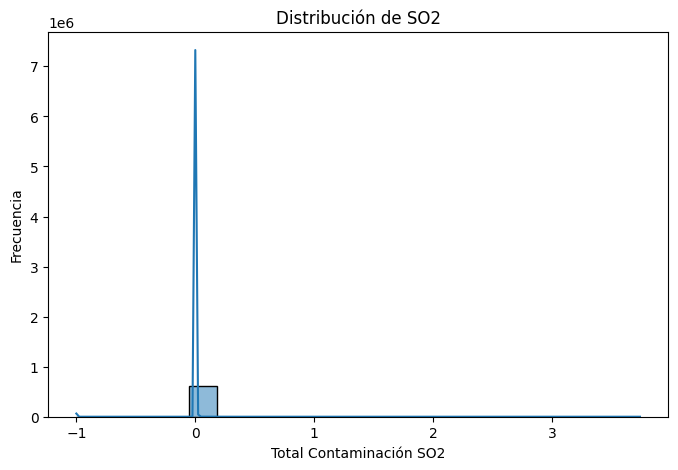

In [14]:
# Crear un histograma de la columna "SO2"
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,5))  # Tamaño del gráfico
sns.histplot(df_measurement["SO2"], bins=20, kde=True)  # Gráfico con curva KDE (densidad)
plt.title("Distribución de SO2")  # Título del gráfico
plt.xlabel("Total Contaminación SO2")  # Etiqueta del eje X
plt.ylabel("Frecuencia")  # Etiqueta del eje Y
plt.show()  # Mostrar gráfico

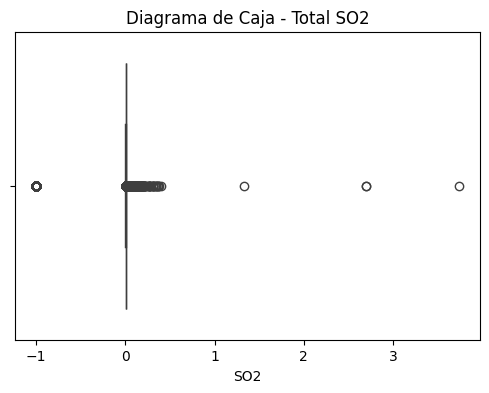

In [15]:
# Boxplot (Diagrama de Caja), Un boxplot nos ayuda a identificar valores extremos (outliers) en los datos.
plt.figure(figsize=(6,4))
sns.boxplot(x=df_measurement["SO2"])
plt.title("Diagrama de Caja - Total SO2")
plt.show()

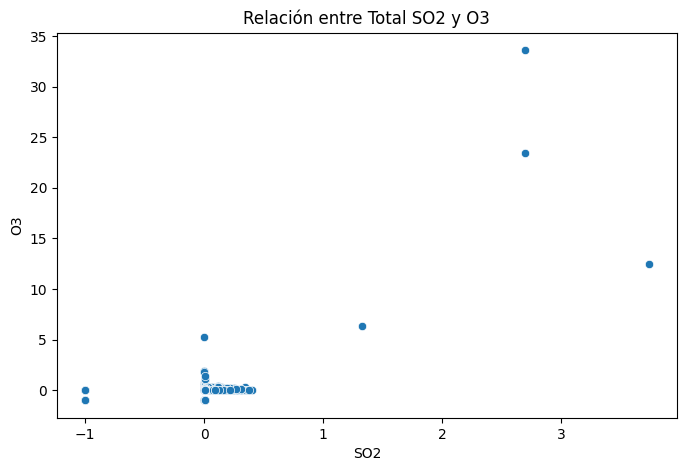

In [16]:
# Los gráficos de dispersión (scatter plots) nos ayudan a ver si dos variables están relacionadas.
# Gráfico de dispersión entre SO2 y O3
plt.figure(figsize=(8,5))
sns.scatterplot(x=df_measurement["SO2"], y=df_measurement["O3"])
plt.title("Relación entre Total SO2 y O3")
plt.xlabel("SO2")
plt.ylabel("O3")
plt.show()

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


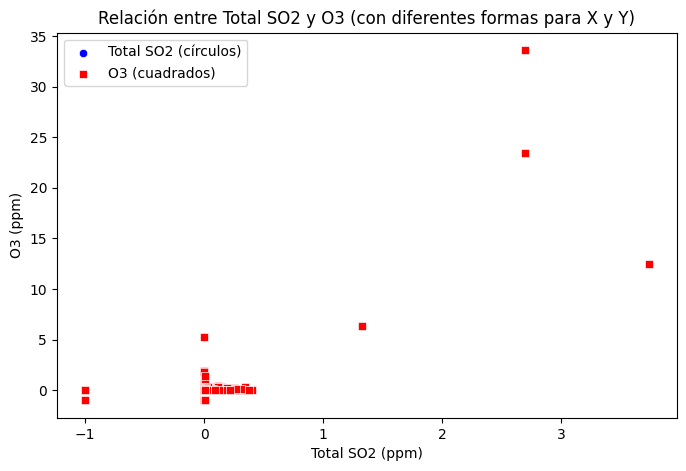

In [17]:
# Los gráficos de dispersión (scatter plots) nos ayudan a ver si dos variables están relacionadas.
# Gráfico de dispersión entre SO2 y O3
plt.figure(figsize=(8,5))

# Gráfico de dispersión con círculos para eje X
sns.scatterplot(x=df_measurement["SO2"], y=df_measurement["O3"], marker="o", label="Total SO2 (círculos)", color="blue")

# Gráfico de dispersión con cuadrados para eje Y
sns.scatterplot(x=df_measurement["SO2"], y=df_measurement["O3"], marker="s", label="O3 (cuadrados)", color="red")

plt.title("Relación entre Total SO2 y O3 (con diferentes formas para X y Y)")
plt.xlabel("Total SO2 (ppm)")
plt.ylabel("O3 (ppm)")
plt.legend()
plt.show()

In [19]:
# Usando IQR (Interquartile Range) para detectar outliers en SO2
# Calcular el IQR para SO2
Q1_SO2= df_measurement["SO2"].quantile(0.25)
Q3_SO2 = df_measurement["SO2"].quantile(0.75)
IQR_SO2 = Q3_SO2 - Q1_SO2

# Definir umbrales para outliers
lower_bound_SO2 = Q1_SO2 - 1.5 * IQR_SO2 # limite inferior
upper_bound_SO2 = Q3_SO2 + 1.5 * IQR_SO2 # limite superior

# filtrar los datos para hallar los outlier
outliers_SO2 = df_measurement[(df_measurement["SO2"] < lower_bound_SO2) | (df_measurement["SO2"] > upper_bound_SO2)]
print(outliers_SO2)

# Cantidad de outlier
cantidad_outliers_SO2 = len(outliers_SO2)
print(f"Cantidad de outliers_SO2: {cantidad_outliers_SO2}")

           Measurement date  Station code   Latitude   Longitude    SO2  \
230     2021-01-10 14:00:00           204  37.572016  127.005008  0.051   
231     2021-01-10 15:00:00           204  37.572016  127.005008  0.029   
400     2021-01-17 16:00:00           204  37.572016  127.005008  0.009   
401     2021-01-17 17:00:00           204  37.572016  127.005008  0.009   
402     2021-01-17 18:00:00           204  37.572016  127.005008  0.009   
...                     ...           ...        ...         ...    ...   
619787  2023-09-16 17:00:00           228  37.544962  127.136792  0.045   
620354  2023-10-10 14:00:00           228  37.544962  127.136792  0.108   
620521  2023-10-17 13:00:00           228  37.544962  127.136792  0.122   
620881  2023-11-01 13:00:00           228  37.544962  127.136792  0.092   
621287  2023-11-18 11:00:00           228  37.544962  127.136792  0.023   

          NO2     O3   CO   PM10  PM2.5  
230     0.007  0.014  6.0  143.0  149.0  
231     0.012  

In [20]:
# Usando IQR (Interquartile Range) para detectar outliers en O3
# Calcular el IQR para SO2
Q1_O3= df_measurement["O3"].quantile(0.25)
Q3_O3 = df_measurement["O3"].quantile(0.75)
IQR_O3 = Q3_O3 - Q1_O3

# Definir umbrales para outliers
lower_bound_O3 = Q1_O3 - 1.5 * IQR_O3 # limite inferior
upper_bound_O3 = Q3_O3 + 1.5 * IQR_O3 # limite superior

# filtrar los datos para hallar los outlier
outliers_O3 = df_measurement[(df_measurement["O3"] < lower_bound_O3) | (df_measurement["O3"] > upper_bound_O3)]
print(outliers_O3)

# Cantidad de outlier
cantidad_outliers_O3 = len(outliers_O3)
print(f"Cantidad de outliers_O3: {cantidad_outliers_O3}")

           Measurement date  Station code   Latitude   Longitude    SO2  \
854     2021-02-05 14:00:00           204  37.572016  127.005008 -1.000   
855     2021-02-05 15:00:00           204  37.572016  127.005008 -1.000   
856     2021-02-05 16:00:00           204  37.572016  127.005008 -1.000   
857     2021-02-05 17:00:00           204  37.572016  127.005008 -1.000   
858     2021-02-05 18:00:00           204  37.572016  127.005008 -1.000   
...                     ...           ...        ...         ...    ...   
619675  2023-09-12 01:00:00           228  37.544962  127.136792 -1.000   
619676  2023-09-12 02:00:00           228  37.544962  127.136792 -1.000   
619677  2023-09-12 03:00:00           228  37.544962  127.136792 -1.000   
620090  2023-09-29 14:00:00           228  37.544962  127.136792  0.004   
620091  2023-09-29 15:00:00           228  37.544962  127.136792  0.004   

          NO2     O3   CO  PM10  PM2.5  
854    -1.000 -1.000 -1.0  -1.0   -1.0  
855    -1.000 -1.

In [21]:
# Calculo de la correlación entre SO2 y O3
correlacion_SO2_O3 = df_measurement["SO2"].corr(df_measurement["O3"])
print(f"Correlación entre SO2 y O3: {correlacion_SO2_O3}")

Correlación entre SO2 y O3: 0.7906982637734761


In [22]:
# Calcular la correlación entre "SO2" y "O3", otra forma:
correlacion_SO2_O3 = df_measurement[["SO2", "O3"]].corr()
print(correlacion_SO2_O3)

          SO2        O3
SO2  1.000000  0.790698
O3   0.790698  1.000000


In [23]:
# calculo de la matriz de correlación, para ello debemos excluir en primer lugar las columnas no numéricas (fecha)
numeric_columns = df_measurement.select_dtypes(include=['number']).columns
matriz_correlacion_df_measurement = df_measurement[numeric_columns].corr()
print(matriz_correlacion_df_measurement)

              Station code  Latitude  Longitude       SO2       NO2        O3  \
Station code      1.000000 -0.495615   0.049264  0.031512  0.023045  0.022350   
Latitude         -0.495615  1.000000   0.309475 -0.009980 -0.022551 -0.002206   
Longitude         0.049264  0.309475   1.000000  0.012993  0.007576  0.005088   
SO2               0.031512 -0.009980   0.012993  1.000000  0.694126  0.790698   
NO2               0.023045 -0.022551   0.007576  0.694126  1.000000  0.774785   
O3                0.022350 -0.002206   0.005088  0.790698  0.774785  1.000000   
CO               -0.035953  0.057503   0.035085  0.297424  0.236723  0.177064   
PM10              0.029206 -0.022149  -0.023051  0.046651  0.053607  0.036097   
PM2.5             0.017362 -0.024358  -0.021216  0.046153  0.056513  0.031983   

                    CO      PM10     PM2.5  
Station code -0.035953  0.029206  0.017362  
Latitude      0.057503 -0.022149 -0.024358  
Longitude     0.035085 -0.023051 -0.021216  
SO2      

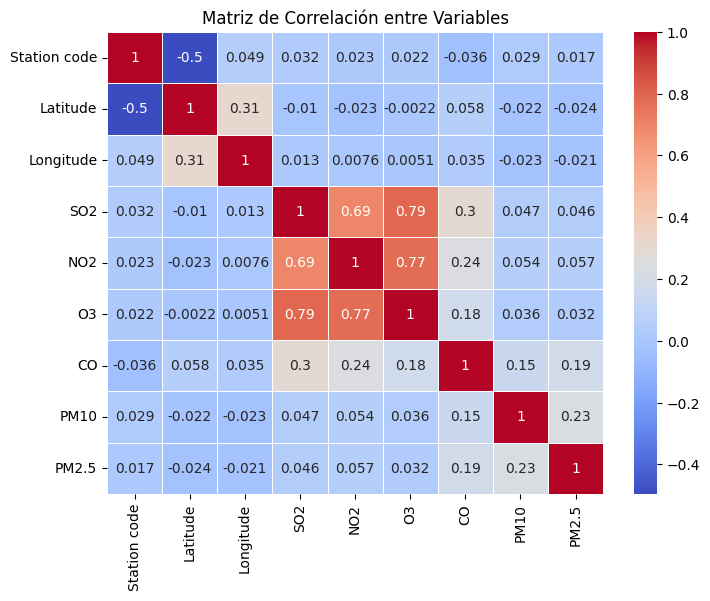

In [24]:
# creamos un heatmap
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_correlacion_df_measurement, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Matriz de Correlación entre Variables")
plt.show()

In [ ]:
# Modelo Regresión Lineal Simple
